# Rule-Based Sentiment Classifier

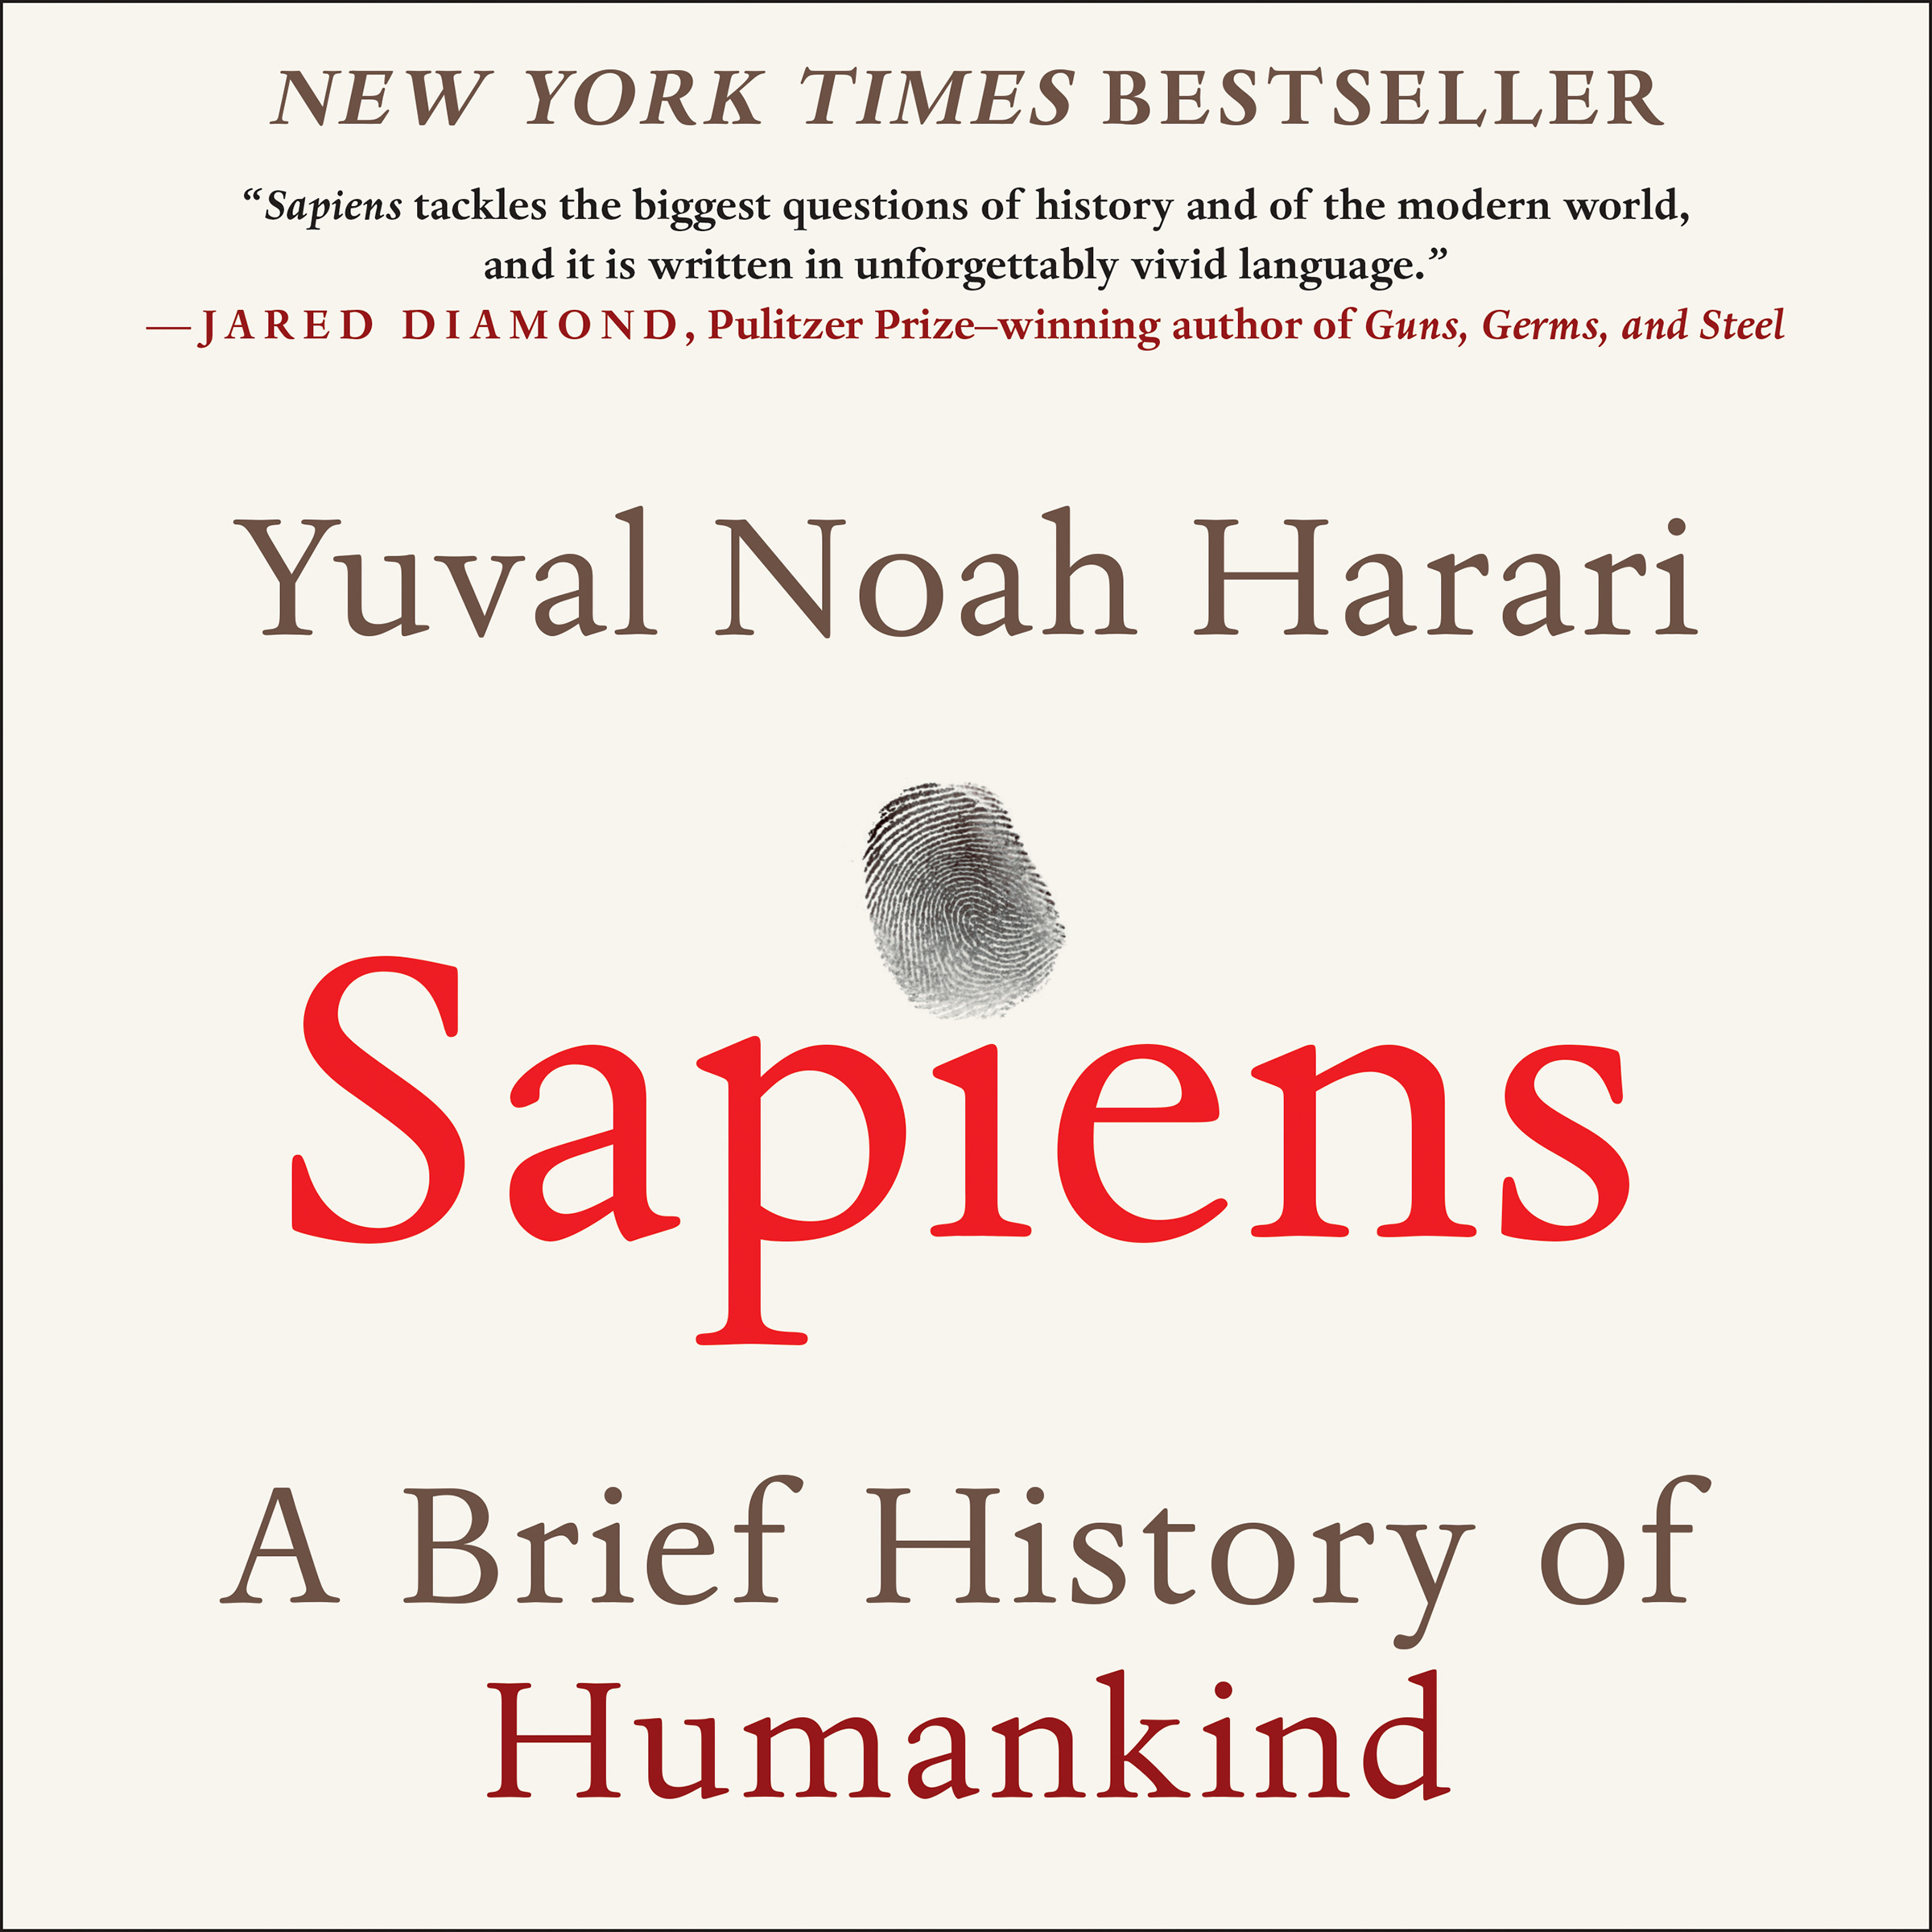

In [63]:
from IPython.display import Image
Embed= Image('sapiens.jpg')
Embed

In [58]:
# Reviews from Goodreads: https://www.goodreads.com/book/show/23692271-sapiens?from_search=true 
review_1="""I believe I am relatively familiar with history in general, 
        and I'm usually not very excited about reading more about it. 
        But this book was something else. Beautifully written and easy to read,
        this book just made me want to know more and more about how the author thinks
        the world evolved to what it is today. Revolution by revolution, religion by religion,
        conception by conception, things were simplified and yet still maintained valid points
        - and it was never boring. The best thing about it was that it actually made me think.
        The author doesn't treat you as ignorant at all - he doesn't assume you know nothing 
        but assume you know a lot and understand a lot, and doesn't lecture about anything, 
        and that attitude makes the book a pleasure to read.Just read it."""

review_2="""Had I stopped reading after the first section, I’d have given this a five stars and whined
        that the Goodreads platform doesn’t aloe reviewers to go higher. But I didn’t stop. I kept reading,
        . . . until it got so bad, I found myself unable to do more than skim, and eventually, to just
        skipping large chunks. It starts out as a fascinating discussion of the development and rise of
        our species, homo sapiens. But starting in the second section on the Agricultural Revolution,
        Harari shift gears and drops any pretense of an scholarly work. From that point on, it’s all
        personal bias all the time. This guy absolutely hates human beings and society.
        It seems that he is completely stuck in the idea that the world would have been better off had
        humanity simply stayed put in the hunter-gatherer stage. It seems all the countless billions of
        humans who lived since then are deluded and don't get it, and that only he understands. Yeah, right!"""

#-------------------------------------------
positive_lex=["excited", "beautiful", "easy", "valid", "simplified", "think", "best", "understand", 
          "pleasure", "read", "fascinating"]
#-------------------------------------------
negative_lex=["boring", "ignorant", "lecture", "bad", "bias", "hate", "pretense", "skip", "drop", "deluded"]

In [61]:
def count_polarity(lex, text):
    """
    lex: list of polarized words (positive or negative)
    text: text whose sentiment we want to 'measure'
    """
    count=0
    for w in lex:
        cw=text.count(w) # count of current word
        count+=cw # add count of current word to global count
    return count
#-------------------   
# Process a review (e.g., review_1)
#-----------------------------------
print("Processing \"Review_1\"...\n")
# First, call function on positive words 
pos_count= count_polarity(positive_lex, review_1)
print("Number of positive words: {}".format(pos_count)) 
# Second, call function on negative words 
neg_count= count_polarity(negative_lex, review_1)
print("Number of negative words: {}".format(neg_count))


Processing "Review_1"...

Number of positive words: 13
Number of negative words: 3


In [60]:
#-------------------   
# Process a review (e.g., review_2)
#-----------------------------------
print("Processing \"Review_2\"...\n")
# First, call function on positive words 
pos_count= count_polarity(positive_lex, review_2)
print("Number of positive words: {}".format(pos_count)) 
# Second, call function on negative words 
neg_count= count_polarity(negative_lex, review_2)
print("Number of negative words: {}".format(neg_count))

Processing "Review_2"...

Number of positive words: 5
Number of negative words: 7


In [27]:
import re
#-------------------
def read_GI_lexicon_short(infile):
    lines= open(infile, "r").readlines()
    words=[]
    top_lines=lines[:50]
    for l in top_lines:
        w=l.split()[0] # Keep only the word of interest. Rest is other info.
        w=w.lower()
        # Some words have different senses, indicated by "#" followed by a number. Let's clean these
        if "#" in w:
            print(w),
            w=w[0:w.index("#")]
            print(w)
        words.append(w)
    return words

#-------------------
# Call the function:
#-------------------
infile="GIpos.txt"
my_positive_list= read_GI_lexicon_short(infile)
print("\nPrinting sample words...\n")
print(my_positive_list[:10])

accord#2 accord
accord#3 accord
accord#5 accord
actual#1 actual
actual#2 actual

Printing sample words...

['abide', 'able', 'abound', 'absolve', 'absorbent', 'absorption', 'abundance', 'abundant', 'accede', 'accentuate']


In [ ]:
# Let's get the whole list of words

In [65]:
import re
#-------------------
def read_GI_lexicon(infile):
    lines= open(infile, "r").readlines()
    words=[]
    #top_lines=lines[:50]
    for l in lines:
        w=l.split()[0] # Keep only the word of interest. Rest is other info.
        w=w.lower()
        # Some words have different senses, indicated by "#" followed by a number. Let's clean these
        if "#" in w:
            #print(w),
            w=w[0:w.index("#")]
            #print(w)
        words.append(w)
    return words

#-------------------
# Call the function:
#-------------------
infile="GIpos.txt"
my_positive_list= read_GI_lexicon(infile)
print("\nPrinting sample words...\n")
print(my_positive_list[:50])


Printing sample words...

['abide', 'able', 'abound', 'absolve', 'absorbent', 'absorption', 'abundance', 'abundant', 'accede', 'accentuate', 'accept', 'acceptable', 'acceptance', 'accessible', 'accession', 'acclaim', 'acclamation', 'accolade', 'accommodate', 'accommodation', 'accompaniment', 'accomplish', 'accomplishment', 'accord', 'accord', 'accord', 'accordance', 'accountable', 'accrue', 'accuracy', 'accurate', 'accurateness', 'achieve', 'achievement', 'acknowledgement', 'acquaint', 'acquaintance', 'acquit', 'acquittal', 'actual', 'actual', 'actuality', 'adamant', 'adaptability', 'adaptable', 'adaptation', 'adaptive', 'adept', 'adeptness', 'adequate']


In [66]:
42081+71981+91681+91681+71981

369405

In [31]:
print(len(my_positive_list))

1914


In [ ]:
# Let's get the negative words, from the neg file

In [32]:
infile="GIneg.txt"
neg_list= read_GI_lexicon(infile)
print("\nPrinting sample words...\n")
print(neg_list[:20])


Printing sample words...

['word', 'abandon', 'abandonment', 'abate', 'abdicate', 'abhor', 'abject', 'abnormal', 'abolish', 'abominable', 'abrasive', 'abrupt', 'abscond', 'absence', 'absent', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'abuse']


In [62]:
print(len(neg_list))

2294


## SentiWordNet Files

In [34]:
import re

def clean_lexicon(lex_input):
    lex_file_l=open(lex_input, "r").readlines()
    
    new_lex_file_l=[]
    for i in lex_file_l:
        i=i.strip()
        #i= i[:-1] # i is a word in the list
        i= re.sub("_", " ", i)
        new_lex_file_l.append(i)
    return new_lex_file_l

my_positive_list= clean_lexicon("pos.swn.txt")
print my_positive_list[:10]
print "*"*50
my_neg_list= clean_lexicon("neg.swn.txt")
print my_neg_list[:10]

['couthie', 'confidence man', 'definiteness', 'changelessness', 'morally', 'ethmoidal vein', 'unquestionableness', 'uselessness', 'top-quality', 'good-humoredness']
**************************************************
['twilight of the gods', 'rumbustious', 'screaming', 'grueling', 'inanimate', 'stern', 'changelessness', 'sugarless', 'order pseudoscorpiones', 'modest']


In [20]:
# What if we wanted to know the percentages of positive and negative words to the overall words (tokens) in a file.
# Let's write some code to do that based on the positive and negative entries we acquired from SentiWordNet:
import re

def clean_lexicon(lex_input):
    lex_file_l=open(lex_input, "r").readlines()
    
    new_lex_file_l=[]
    for i in lex_file_l:
        i=i.strip()
        #i= i[:-1] # i is a word in the list
        i= re.sub("_", " ", i)
        new_lex_file_l.append(i)
    return new_lex_file_l

# Change the path to your local path:
pos_lex= clean_lexicon("pos.swn.txt")
neg_lex= clean_lexicon("neg.swn.txt")


# Determine the percentage of positive words in a file:
def get_sentiment_diversity(pos_lex, neg_lex, input_file):
    '''
    just returns some stats about % of pos and neg sentiment in a file...
    '''
    input_string=open(input_file, "r").read().lower()
    len_words= float(len(input_string.split()))
    pos_count=0
    neg_count=0
    for w in pos_lex:
        pos_count+= input_string.count(w)
    for w in neg_lex:
        neg_count += input_string.count(w)
    return pos_count, neg_count, len_words
   
# Call the function...
input_file="hamlet.txt"
pos_count, neg_count, len_words= get_sentiment_diversity(pos_lex, neg_lex, input_file)
#-------------------------
print "% of positive: ", round(pos_count/len_words, 4) 
print "% of negative: ", round(neg_count/len_words, 4)

% of positive:  0.0864
% of negative:  0.1653


# Using a Main function

In [ ]:
# Why don't we now use a main function to call the code we wrote so far?

In [64]:
import re
import string
punc = [char for char in string.punctuation]

def clean(to_filter_list, text):
    '''
    input: 
        a. list of undesirable items we want to remove from text
        b. text we want to clean
    output:
        cleaned text
    '''
    for i in to_filter_list:
        #print i
        i="\\"+i
        text=re.sub(i, "", text)
    return text


def clean_lexicon(lex_input):
    lex_file_l=open(lex_input, "r").readlines()
    
    new_lex_file_l=[]
    for i in lex_file_l:
        i=i.strip()
        #i= i[:-1] # i is a word in the list
        i= re.sub("_", " ", i)
        new_lex_file_l.append(i)
    return new_lex_file_l


# Determine the percentage of positive words in a file:
def get_sentiment_diversity(pos_lex, neg_lex, input_file):
    '''
    just returns some stats about % of pos and neg sentiment in a file...
    '''
    input_string=open(input_file, "r").read().lower()
    input_string= clean(punc, input_string)
    len_words= float(len(input_string.split()))
    pos_count=0
    neg_count=0
    for w in pos_lex:
        pos_count+= input_string.count(w)
    for w in neg_lex:
        neg_count += input_string.count(w)
    return pos_count, neg_count, len_words
   
def main():
    # Call the code...
    #------------------
    print("Welcome to the sentiment statistician!!!")
    # Get the lexicon:
    pos_lex= clean_lexicon("pos.swn.txt")
    neg_lex= clean_lexicon("neg.swn.txt")
    # Read the hamlet file
    input_file="hamlet.txt"
    # get sentiment stats
    pos_count, neg_count, len_words= get_sentiment_diversity(pos_lex, neg_lex, input_file)
    #-------------------------
    print "% of positive: ", round(pos_count/len_words, 4) 
    print "% of negative: ", round(neg_count/len_words, 4)

    
if __name__ == "__main__":
    main()

Welcome to the sentiment statistician!!!
% of positive:  0.0864
% of negative:  0.1673
